<a href="https://colab.research.google.com/github/prakharraj11/UML501_MachineLearning/blob/main/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2**

**Part I: Based on Feature Selection, cleaning, and Preprocessing to Construct an Input from Data Source**

* (a) Examine the values of each attribute and Select a set of attributes only that would affect to predict
future bike buyers to create your input for data mining algorithms. Remove all the unnecessary
attributes. (Select features just by analysis).

* (b) Create a new Data Frame with the selected attributes only.

* (c) Determine a Data value type (Discrete, or Continuous, then Nominal, Ordinal, Interval, Ratio) of
each attribute in your selection to identify preprocessing tasks to create input for your data mining.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import kagglehub
path = kagglehub.dataset_download("jahias/microsoft-adventure-works-cycles-customer-data")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/microsoft-adventure-works-cycles-customer-data


In [40]:
import os
print(os.listdir(path))

['AWCustomers.csv', 'AWTest-Classification.csv', 'AWSales.csv', 'AWTest-Regression.csv']


In [42]:
df = pd.read_csv(path+'/AWCustomers.csv')
df2 = pd.read_csv(path+'/AWSales.csv')

In [47]:
merged = pd.merge(df, df2, on='CustomerID')
merged.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,BikeBuyer,AvgMonthSpend
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,...,M,M,1,3,0,1,81916,2017-03-06,1,50.97
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,...,M,M,1,2,1,2,81076,2017-03-06,1,53.11
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,...,F,S,0,3,0,0,86387,2017-03-06,1,54.08
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,...,M,M,1,2,1,2,61481,2017-03-06,1,56.93
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,...,M,S,1,1,0,0,51804,2017-03-06,1,55.41


In [48]:
merged.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'LastUpdated', 'BikeBuyer', 'AvgMonthSpend'],
      dtype='object')

In [49]:
merged = merged.drop(columns=['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber','Education'
       ,'Gender','LastUpdated'])

In [52]:
merged.columns

Index(['BirthDate', 'Occupation', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', 'AvgMonthSpend'],
      dtype='object')

In [58]:
merged['MaritalStatus'].replace({'M':1, 'S':0}, inplace=True)

Adding a derived feature that is Age from using date of birth

In [64]:
merged['BirthDate'] = pd.to_datetime(merged['BirthDate'])
today = pd.to_datetime('today')
merged['Age'] = ((today - merged['BirthDate']).dt.days / 365.25).astype(int)
merged.head()

,BirthDate,Occupation,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AvgMonthSpend,Age
0,1987-11-13,Clerical,1,1,3,0,1,81916,1,50.97,37
1,1972-07-21,Clerical,1,1,2,1,2,81076,1,53.11,53
2,1985-11-09,Clerical,0,0,3,0,0,86387,1,54.08,39
3,1977-10-18,Skilled Manual,1,1,2,1,2,61481,1,56.93,47
4,1975-02-05,Skilled Manual,0,1,1,0,0,51804,1,55.41,50


In [65]:
merged.drop(columns=['BirthDate'], inplace=True)

In [67]:
merged.columns

Index(['Occupation', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'BikeBuyer',
       'AvgMonthSpend', 'Age'],
      dtype='object')

In [74]:
# Now by looking at the columns above we can say
continuos_feature = ['AvgMonthSpend', 'YearlyIncome']
Discrete_features = ['Occupation', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'BikeBuyer','Age']
Nominal = ['Occupation', 'MaritalStatus', 'HomeOwnerFlag','BikeBuyer']
ordinal = []
Interval = []
Ratio = ['AvgMonthSpend','NumberChildrenAtHome', 'YearlyIncome','NumberCarsOwned','Age']

**Part II: Data Preprocessing and Transformation**

Depending on the data type of each attribute, transform each object from your preprocessed data.
Use all the data rows (~= 18000 rows) with the selected features as input to apply all the tasks below, do
not perform each task on the smaller data set that you got from your random sampling result.

* (a) Handling Null values

* (b) Normalization

* (c) Discretization (Binning) on Continuous attributes or Categorical Attributes with too many different
values

* (d) Standardization/Normalization

* (e) Binarization (One Hot Encoding)

In [76]:
print(merged.isnull().sum())

Occupation              0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
BikeBuyer               0
AvgMonthSpend           0
Age                     0
dtype: int64


In [ ]:
# There is no need for Null value handling when we do not have any null value in any of the given colummns

In [77]:
#normalization

numerical_features = ['AvgMonthSpend', 'YearlyIncome', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'Age']
categorical_features = ['Occupation', 'MaritalStatus', 'HomeOwnerFlag','BikeBuyer']

#for numerical features using Z score normalization

for feature in numerical_features:
    mean = merged[feature].mean()
    std = merged[feature].std()
    merged[feature] = (merged[feature] - mean) / std

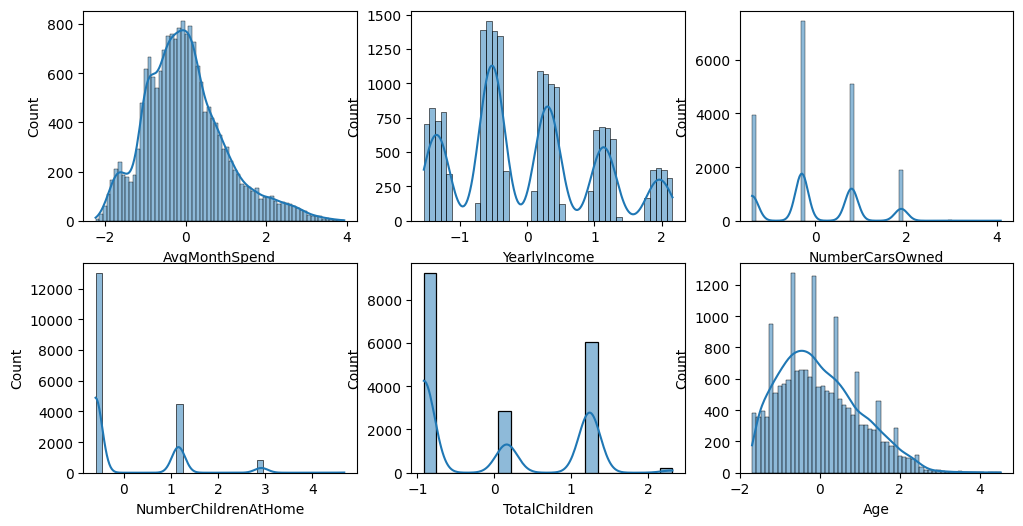

In [78]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(merged[feature], kde=True)

From the curves we can analyze and understand that binning is required in Age and Avg Monthly spends

In [80]:
#Discretization (binning)

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
def discretize(bins, strategy,cols):
  binner = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy, subsample=None)
  for i in cols:
    merged[i] = binner.fit_transform(merged[[i]])

discretize(4,'quantile',['Age','AvgMonthSpend'])

Now we can see the binned data of age and AvgMonthlySpend

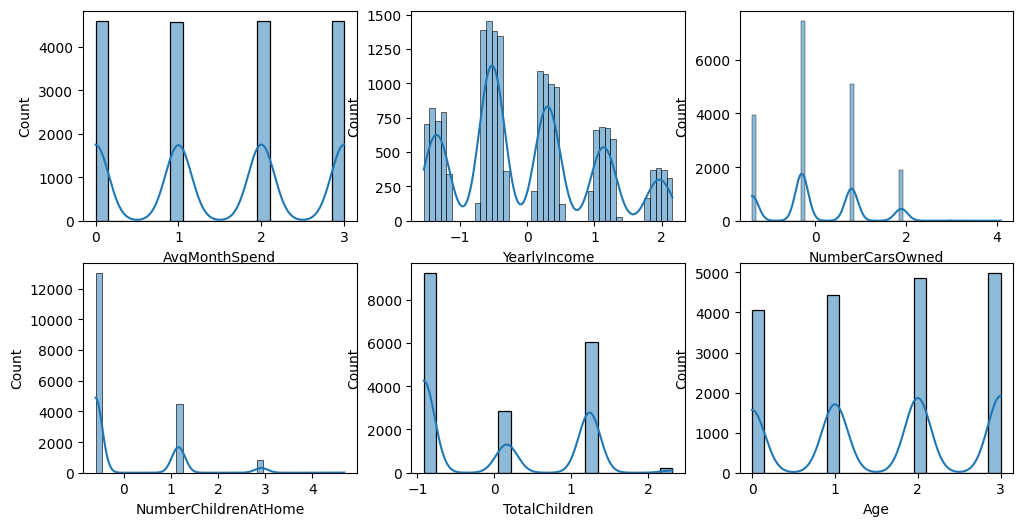

In [81]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(merged[feature], kde=True)

In [86]:
merged.columns

Index(['Occupation', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'BikeBuyer',
       'AvgMonthSpend', 'Age'],
      dtype='object')

In [87]:
#One hot encoding

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(merged[categorical_features])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_features))

merged = pd.concat([merged, one_hot_df], axis=1)

merged = merged.drop(columns=categorical_features)

**Part III: Calculating Proximity /Correlation Analysis of two features**

Make sure each attribute is transformed in a same scale for numeric attributes and Binarization for each
nominal attribute, and each discretized numeric attribute to standardization. Make sure to apply a correct
similarity measure for nominal (one hot encoding)/binary attributes and numeric attributes respectively.

* (a) Calculate Similarity in Simple Matching, Jaccard Similarity, and Cosine Similarity between two
following objects of your transformed input data.

* (b) Calculate Correlation between two features Commute Distance and Yearly Income

In [93]:
merged

,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,Age,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,MaritalStatus_0,MaritalStatus_1,HomeOwnerFlag_0,HomeOwnerFlag_1,BikeBuyer_0,BikeBuyer_1,NumberChildrenAtHome_Binary
0,1.892473,-0.594355,0.161337,0.298547,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
1,0.798367,1.163248,1.239719,0.271173,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
2,1.892473,-0.594355,-0.917044,0.444249,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
3,0.798367,1.163248,1.239719,-0.367391,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1
4,-0.295738,-0.594355,-0.917044,-0.682747,3.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18356,-0.295738,-0.594355,1.239719,-0.645303,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0
18357,0.798367,-0.594355,-0.917044,-0.383327,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0
18358,0.798367,-0.594355,-0.917044,-0.680955,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0
18359,-1.389843,-0.594355,-0.917044,0.469993,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


In [90]:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [91]:
jaccard(merged['YearlyIncome'],merged['AvgMonthSpend'])

0.0

In [95]:
merged['NumberChildrenAtHome_Binary'] = (merged['NumberChildrenAtHome'] > 0).astype(int)

for bike_buyer_col in ['BikeBuyer_0', 'BikeBuyer_1']:
    jaccard_sim = jaccard(merged['NumberChildrenAtHome_Binary'], merged[bike_buyer_col])
    print(f"Jaccard Similarity between NumberChildrenAtHome_Binary and {bike_buyer_col}: {jaccard_sim}")

Jaccard Similarity between NumberChildrenAtHome_Binary and BikeBuyer_0: 5.446623093681917e-05
Jaccard Similarity between NumberChildrenAtHome_Binary and BikeBuyer_1: 5.446623093681917e-05


In [96]:
# correlation calculation

correlation = merged['AvgMonthSpend'].corr(merged['YearlyIncome'])
print(f"Correlation between AvgMonthSpend and YearlyIncome: {correlation}")

Correlation between AvgMonthSpend and YearlyIncome: 0.5678276794227628


Fun Assignment